<a href="https://colab.research.google.com/github/RiteshPatil2/aws-serverless-ecommerce-platform/blob/main/Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# List of CSV filenames for batting and bowling stats
batting_files = [
    "BATTING STATS - IPL_2016.csv",
    "BATTING STATS - IPL_2017.csv",
    "BATTING STATS - IPL_2018.csv",
    "BATTING STATS - IPL_2019.csv",
    "BATTING STATS - IPL_2020.csv",
    "BATTING STATS - IPL_2021.csv",
    "BATTING STATS - IPL_2022.csv"
]

bowling_files = [
    "BOWLING STATS - IPL_2016.csv",
    "BOWLING STATS - IPL_2017.csv",
    "BOWLING STATS - IPL_2018.csv",
    "BOWLING STATS - IPL_2019.csv",
    "BOWLING STATS - IPL_2020.csv",
    "BOWLING STATS - IPL_2021.csv",
    "BOWLING STATS - IPL_2022.csv"
]

def combine_csv_files(file_list):
    df_list = []
    for file in file_list:
        df = pd.read_csv(file)
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

# Combine the CSV files
batting_combined = combine_csv_files(batting_files)
bowling_combined = combine_csv_files(bowling_files)

# Save the combined DataFrames to new CSV files
batting_combined.to_csv('combined_batting_stats.csv', index=False)
bowling_combined.to_csv('combined_bowling_stats.csv', index=False)

print("Batting and Bowling stats combined successfully!")


Batting and Bowling stats combined successfully!


In [ ]:
# Merge the two DataFrames on the 'Player' column
merged_df = pd.merge(batting_combined, bowling_combined, on='Player', suffixes=('_Batting', '_Bowling'))

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_stats.csv', index=False)

# Display the first few rows of the merged DataFrame
print("Merged Stats:")
print(merged_df.head())


Merged Stats:
   POS_Batting        Player  Mat_Batting  Inns_Batting  NO  Runs_Batting  \
0           10  Suresh Raina           15            15   1           399   
1           14  Yusuf Pathan           15            13   8           361   
2           14  Yusuf Pathan           15            13   8           361   
3           14  Yusuf Pathan           15            13   8           361   
4           19  Dwayne Smith           12            12   1           324   

    HS Avg_Batting   BF  SR_Batting  ...  Inns_Bowling    Ov  Runs_Bowling  \
0   75        28.5  312      127.88  ...             6  12.0           102   
1  63*        72.2  248      145.56  ...             4   6.0            33   
2  63*        72.2  248      145.56  ...             4   4.0            41   
3  63*        72.2  248      145.56  ...             1   2.0            14   
4   73       29.45  221      146.60  ...             8  18.0           153   

   Wkts   BBI  Avg_Bowling   Econ  SR_Bowling  4w  5w 

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 POS_Batting     0
Player          0
Mat_Batting     0
Inns_Batting    0
NO              0
Runs_Batting    0
HS              0
Avg_Batting     0
BF              0
SR_Batting      0
100             0
50              0
4s              0
6s              0
POS_Bowling     0
Mat_Bowling     0
Inns_Bowling    0
Ov              0
Runs_Bowling    0
Wkts            0
BBI             0
Avg_Bowling     0
Econ            0
SR_Bowling      0
4w              0
5w              0
dtype: int64


In [ ]:
# Check data types of each column
print("Data types of each column:\n", merged_df.dtypes)


Data types of each column:
 POS_Batting       int64
Player           object
Mat_Batting       int64
Inns_Batting      int64
NO                int64
Runs_Batting      int64
HS               object
Avg_Batting      object
BF                int64
SR_Batting      float64
100               int64
50                int64
4s                int64
6s                int64
POS_Bowling       int64
Mat_Bowling       int64
Inns_Bowling      int64
Ov              float64
Runs_Bowling      int64
Wkts              int64
BBI              object
Avg_Bowling     float64
Econ            float64
SR_Bowling      float64
4w                int64
5w                int64
dtype: object


In [ ]:
# Get summary statistics
print("Summary statistics:\n", merged_df.describe())


Summary statistics:
        POS_Batting  Mat_Batting  Inns_Batting           NO  Runs_Batting  \
count  2359.000000  2359.000000   2359.000000  2359.000000   2359.000000   
mean     87.388300     9.859686      5.401017     1.906740     68.498092   
std      35.750148     4.618828      4.073573     1.697611     98.288634   
min       4.000000     1.000000      1.000000     0.000000      0.000000   
25%      60.000000     6.000000      2.000000     1.000000      6.000000   
50%      89.000000    11.000000      4.000000     1.000000     23.000000   
75%     117.000000    14.000000      8.000000     3.000000     92.500000   
max     162.000000    17.000000     17.000000     9.000000    555.000000   

                BF   SR_Batting          100           50           4s  ...  \
count  2359.000000  2359.000000  2359.000000  2359.000000  2359.000000  ...   
mean     51.282747   106.347016     0.006359     0.211530     5.286986  ...   
std      66.348236    54.371133     0.094156     0.669031

In [ ]:
# Check for duplicate rows
duplicates = merged_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [ ]:
# Count unique players
unique_players = merged_df['Player'].nunique()
print("Number of unique players:", unique_players)


Number of unique players: 202


In [ ]:
# View a sample of the data
print("Sample data:\n", merged_df.sample(5))


Sample data:
       POS_Batting             Player  Mat_Batting  Inns_Batting  NO  \
70             56         Axar Patel           14            10   3   
733            64  Washington Sundar            7             6   3   
1597          110         Andrew Tye            1             1   0   
1773           62        Rashid Khan           14            10   2   
1046           50         Axar Patel           14            12   6   

      Runs_Batting   HS Avg_Batting  BF  SR_Batting  ...  Inns_Bowling    Ov  \
70             111  36*       15.85  77      144.15  ...             8  26.0   
733             65   35       21.66  38      171.05  ...            10  30.0   
1597             6    6         6.0   6      100.00  ...             6  21.0   
1773            83   22       10.37  69      120.28  ...            17  68.0   
1046           110   26       18.33  88      125.00  ...            14  48.0   

      Runs_Bowling  Wkts   BBI  Avg_Bowling  Econ  SR_Bowling  4w  5w  
70    

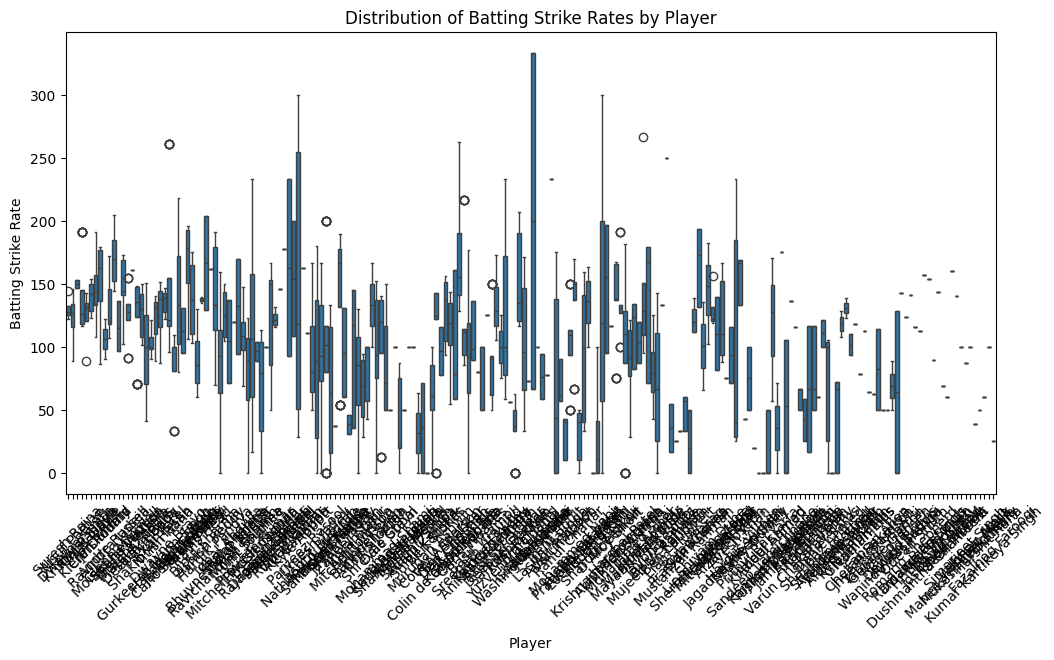

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot with the alias plt
import seaborn as sns


plt.figure(figsize=(12, 6))

sns.boxplot(x='Player', y='SR_Batting', data=merged_df)
plt.title('Distribution of Batting Strike Rates by Player')
plt.xlabel('Player')
plt.ylabel('Batting Strike Rate')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Select only numeric columns for correlation
numeric_df = merged_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
               POS_Batting  Mat_Batting  Inns_Batting        NO  Runs_Batting  \
POS_Batting      1.000000    -0.404702     -0.852232 -0.418601     -0.846047   
Mat_Batting     -0.404702     1.000000      0.612241  0.512203      0.410126   
Inns_Batting    -0.852232     0.612241      1.000000  0.551393      0.848605   
NO              -0.418601     0.512203      0.551393  1.000000      0.343317   
Runs_Batting    -0.846047     0.410126      0.848605  0.343317      1.000000   
BF              -0.848483     0.421240      0.864435  0.341260      0.980399   
SR_Batting      -0.646192     0.178478      0.433419  0.276764      0.450816   
100             -0.133777     0.032282      0.106129 -0.033433      0.232541   
50              -0.540772     0.220820      0.509603  0.114087      0.779397   
4s              -0.783743     0.381617      0.791505  0.259798      0.949581   
6s              -0.734552     0.349349      0.726835  0.288283      0.896165   
POS_Bowling     -0.

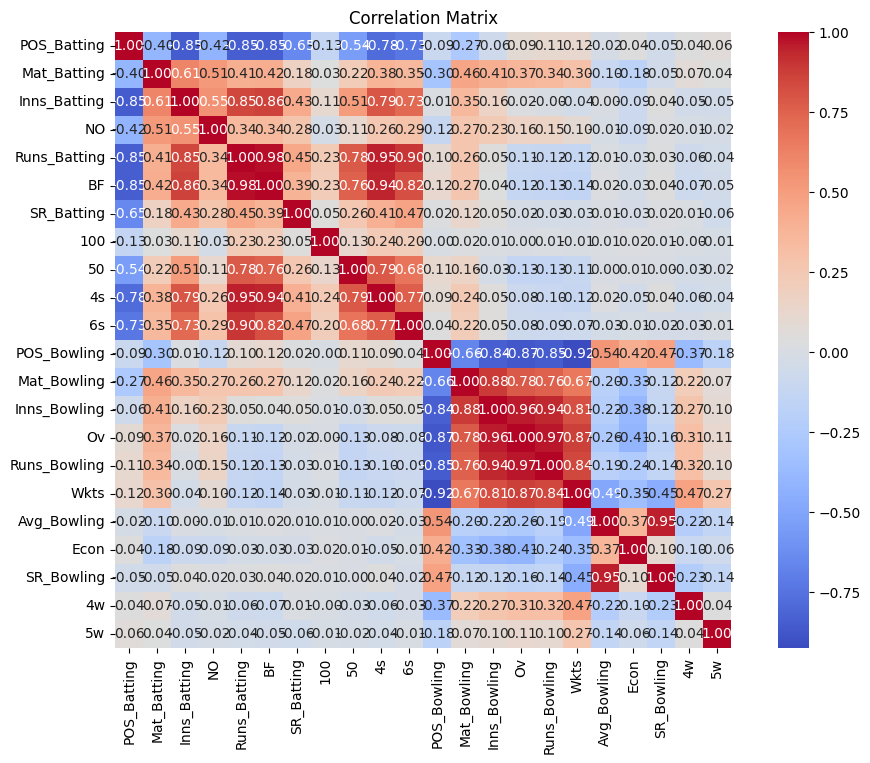

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming merged_df is your DataFrame

# Batting Features
merged_df['Average_Runs_per_Match'] = merged_df['Runs_Batting'] / merged_df['Mat_Batting'].replace(0, np.nan)
merged_df['Strike_Rate_per_Boundary'] = merged_df['SR_Batting'] / (merged_df['4s'] + merged_df['6s']).replace(0, 1)  # Avoid division by zero
merged_df['Boundary_Percentage'] = (merged_df['4s'] + merged_df['6s']) / merged_df['Runs_Batting'].replace(0, 1)

merged_df['Fifty_to_Hundred_Ratio'] = merged_df['50'] / (merged_df['100'] + 1)

# Bowling Features
merged_df['Wickets_per_Over'] = merged_df['Wkts'] / merged_df['Ov'].replace(0, np.nan)  # Avoid division by zero
merged_df['Economy_Rate'] = merged_df['Runs_Bowling'] / merged_df['Ov'].replace(0, np.nan)  # Avoid division by zero
merged_df['Strike_Rate_for_Wickets'] = merged_df['SR_Bowling']  # No change here; assuming SR_Bowling is available

# Combined Features
merged_df['Batting_Bowling_Balance'] = merged_df['Runs_Batting'] / (merged_df['Wkts'] + 1)  # Avoid division by zero
merged_df['Overall_Performance_Score'] = (merged_df['Runs_Batting'] / merged_df['Mat_Batting']) + (merged_df['Wkts'] / merged_df['Mat_Bowling'].replace(0, np.nan))  # Avoid division by zero

# New Metrics (for more comprehensive analysis)
merged_df['Batting_Avg'] = merged_df['Runs_Batting'] / merged_df['Inns_Batting'].replace(0, np.nan)  # Batting Average (Inns_Batting > 0)
merged_df['Bowling_Avg'] = merged_df['Runs_Bowling'] / merged_df['Wkts'].replace(0, np.nan)  # Bowling Average (Wkts > 0)
merged_df['Wicket_Rate'] = merged_df['Mat_Bowling'] / merged_df['Wkts'].replace(0, np.nan)  # Wickets per match

# Display the updated DataFrame (for inspection)
print(merged_df.head())


   POS_Batting        Player  Mat_Batting  Inns_Batting  NO  Runs_Batting  \
0           10  Suresh Raina           15            15   1           399   
1           14  Yusuf Pathan           15            13   8           361   
2           14  Yusuf Pathan           15            13   8           361   
3           14  Yusuf Pathan           15            13   8           361   
4           19  Dwayne Smith           12            12   1           324   

    HS Avg_Batting   BF  SR_Batting  ...  Boundary_Percentage  \
0   75        28.5  312      127.88  ...             0.122807   
1  63*        72.2  248      145.56  ...             0.127424   
2  63*        72.2  248      145.56  ...             0.127424   
3  63*        72.2  248      145.56  ...             0.127424   
4   73       29.45  221      146.60  ...             0.157407   

   Fifty_to_Hundred_Ratio  Wickets_per_Over  Economy_Rate  \
0                     3.0          0.083333          8.50   
1                     3.

In [ ]:
# Drop non-numeric columns
numeric_df = merged_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                            POS_Batting  Mat_Batting  Inns_Batting        NO  \
POS_Batting                   1.000000    -0.404702     -0.852232 -0.418601   
Mat_Batting                  -0.404702     1.000000      0.612241  0.512203   
Inns_Batting                 -0.852232     0.612241      1.000000  0.551393   
NO                           -0.418601     0.512203      0.551393  1.000000   
Runs_Batting                 -0.846047     0.410126      0.848605  0.343317   
BF                           -0.848483     0.421240      0.864435  0.341260   
SR_Batting                   -0.646192     0.178478      0.433419  0.276764   
100                          -0.133777     0.032282      0.106129 -0.033433   
50                           -0.540772     0.220820      0.509603  0.114087   
4s                           -0.783743     0.381617      0.791505  0.259798   
6s                           -0.734552     0.349349      0.726835  0.288283   
POS_Bowling                  -0

In [ ]:
from scipy.stats import ttest_ind

# T-test for two numeric columns, e.g., Batting_Avg and Bowling_Avg (or Overall_Performance_Score)
# Make sure the columns you're interested in exist in the DataFrame
if 'Batting_Avg' in numeric_df.columns and 'Bowling_Avg' in numeric_df.columns:
    batting_avg = numeric_df['Batting_Avg']
    bowling_avg = numeric_df['Bowling_Avg']

    # Perform the T-test
    t_stat, p_value = ttest_ind(batting_avg.dropna(), bowling_avg.dropna())  # Dropping NaNs for a valid comparison
    print(f"T-Test results between Batting_Avg and Bowling_Avg:\nT-statistic: {t_stat}\nP-value: {p_value}")
else:
    print("One of the required columns for T-test is missing.")

# Alternatively, if you want to compare Overall Performance Score (a combined measure)
if 'Overall_Performance_Score' in numeric_df.columns:
    batting_performance = numeric_df['Overall_Performance_Score']

    # Perform T-test comparing batting performance with bowling performance
    t_stat_perf, p_value_perf = ttest_ind(batting_avg.dropna(), batting_performance.dropna())  # Example comparison
    print(f"T-Test results between Batting_Avg and Overall_Performance_Score:\nT-statistic: {t_stat_perf}\nP-value: {p_value_perf}")

else:
    print("Overall_Performance_Score column is missing for the analysis.")


T-Test results between Batting_Avg and Bowling_Avg:
T-statistic: -57.37561991023156
P-value: 0.0
T-Test results between Batting_Avg and Overall_Performance_Score:
T-statistic: 7.146351690376287
P-value: 1.0277423506221753e-12


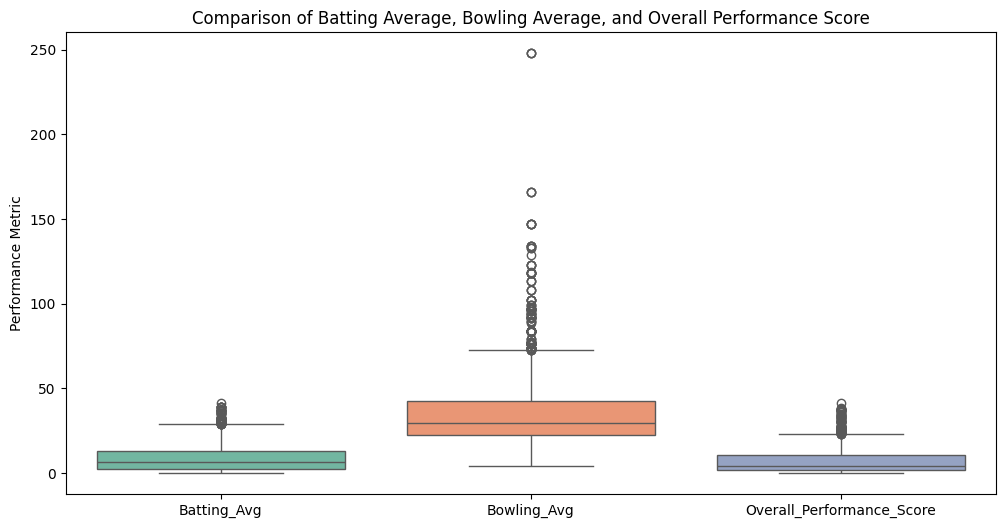

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting (select relevant columns)
batting_avg = numeric_df['Batting_Avg'].dropna()  # Remove NaN values for proper visualization
bowling_avg = numeric_df['Bowling_Avg'].dropna()
overall_performance = numeric_df['Overall_Performance_Score'].dropna()

# Create a boxplot to compare Batting_Avg, Bowling_Avg, and Overall_Performance_Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=[batting_avg, bowling_avg, overall_performance], palette="Set2")

# Adjust the x-ticks to reflect the columns being compared
plt.xticks([0, 1, 2], ['Batting_Avg', 'Bowling_Avg', 'Overall_Performance_Score'])

# Add labels and title
plt.title('Comparison of Batting Average, Bowling Average, and Overall Performance Score')
plt.ylabel('Performance Metric')

# Display the plot
plt.show()


In [ ]:
import numpy as np

# Calculate means and standard deviations for Batting_Avg and Bowling_Avg
mean_batting_avg = merged_df['Batting_Avg'].mean()
mean_bowling_avg = merged_df['Bowling_Avg'].mean()

std_batting_avg = merged_df['Batting_Avg'].std()
std_bowling_avg = merged_df['Bowling_Avg'].std()

n_batting_avg = merged_df['Batting_Avg'].count()
n_bowling_avg = merged_df['Bowling_Avg'].count()

# Cohen's d calculation for Batting_Avg vs Bowling_Avg
cohen_d = (mean_batting_avg - mean_bowling_avg) / np.sqrt((std_batting_avg**2 + std_bowling_avg**2) / 2)

# Output the Cohen's d value
print(f"Cohen's d for Batting_Avg vs Bowling_Avg: {cohen_d}")

# Optionally, you can also calculate Cohen's d for other comparisons, for example, Batting_Avg vs Overall_Performance_Score
mean_performance = merged_df['Overall_Performance_Score'].mean()
std_performance = merged_df['Overall_Performance_Score'].std()

cohen_d_performance = (mean_batting_avg - mean_performance) / np.sqrt((std_batting_avg**2 + std_performance**2) / 2)
print(f"Cohen's d for Batting_Avg vs Overall_Performance_Score: {cohen_d_performance}")


Cohen's d for Batting_Avg vs Bowling_Avg: -1.6706228541220824
Cohen's d for Batting_Avg vs Overall_Performance_Score: 0.2080824307644229


In [ ]:
# Print the list of columns and their data types in the DataFrame
print(merged_df.columns.tolist())  # List all column names
print(merged_df.dtypes)  # Print data types of all columns

# Drop rows where any of the important columns are missing values
merged_df = merged_df.dropna(subset=['Runs_Batting', 'Runs_Bowling', 'Batting_Avg', 'Mat_Batting', 'Bowling_Avg'])

# Convert relevant columns to numeric, forcing errors to NaN
merged_df['Runs_Batting'] = pd.to_numeric(merged_df['Runs_Batting'], errors='coerce')
merged_df['Runs_Bowling'] = pd.to_numeric(merged_df['Runs_Bowling'], errors='coerce')
merged_df['Batting_Avg'] = pd.to_numeric(merged_df['Batting_Avg'], errors='coerce')  # Updated column name
merged_df['Mat_Batting'] = pd.to_numeric(merged_df['Mat_Batting'], errors='coerce')
merged_df['Bowling_Avg'] = pd.to_numeric(merged_df['Bowling_Avg'], errors='coerce')  # Added Bowling_Avg conversion

# Optional: Verify data cleaning after conversion
print(merged_df.head())  # Check first few rows of the cleaned DataFrame
print(merged_df.isnull().sum())  # Check how many missing values remain after cleaning

# Save the updated DataFrame to a CSV file
merged_df.to_csv('/content/updated_merged_file.csv', index=False)


['POS_Batting', 'Player', 'Mat_Batting', 'Inns_Batting', 'NO', 'Runs_Batting', 'HS', 'Avg_Batting', 'BF', 'SR_Batting', '100', '50', '4s', '6s', 'POS_Bowling', 'Mat_Bowling', 'Inns_Bowling', 'Ov', 'Runs_Bowling', 'Wkts', 'BBI', 'Avg_Bowling', 'Econ', 'SR_Bowling', '4w', '5w', 'Average_Runs_per_Match', 'Strike_Rate_per_Boundary', 'Boundary_Percentage', 'Fifty_to_Hundred_Ratio', 'Wickets_per_Over', 'Economy_Rate', 'Strike_Rate_for_Wickets', 'Batting_Bowling_Balance', 'Overall_Performance_Score', 'Batting_Avg', 'Bowling_Avg', 'Wicket_Rate']
POS_Batting                    int64
Player                        object
Mat_Batting                    int64
Inns_Batting                   int64
NO                             int64
Runs_Batting                   int64
HS                            object
Avg_Batting                   object
BF                             int64
SR_Batting                   float64
100                            int64
50                             int64
4s          

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create a new feature for Boundary Percentage (percentage of runs from boundaries)
merged_df['Boundary_Percentage'] = (merged_df['4s'] + merged_df['6s']) / merged_df['Runs_Batting'] * 100

# Define the model with Batting_Avg, SR_Batting, Mat_Batting, and Boundary_Percentage
model = smf.ols('Runs_Batting ~ Batting_Avg + Mat_Batting + SR_Batting + Boundary_Percentage', data=merged_df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Runs_Batting   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     2534.
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:54:05   Log-Likelihood:                -11359.
No. Observations:                2201   AIC:                         2.273e+04
Df Residuals:                    2196   BIC:                         2.276e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -66.0818    

Linear Regression:
  - Cross-Validation MSE: 4512.34
  - MSE on Test Set: 4233.09, RMSE: 65.06, R-squared: 0.56


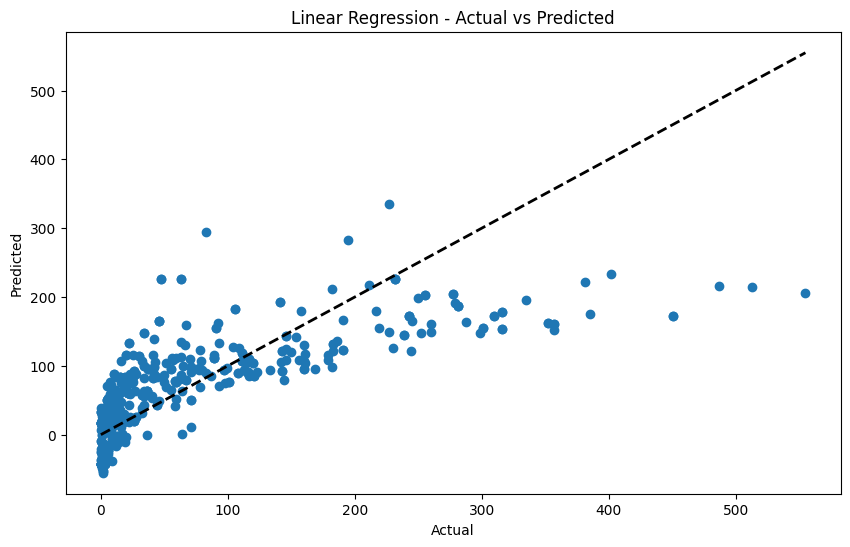

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming merged_df is already defined and loaded with the necessary data

# Create a new feature for Boundary Percentage (percentage of runs from boundaries)
merged_df['Boundary_Percentage'] = (merged_df['4s'] + merged_df['6s']) / merged_df['Runs_Batting'] * 100

# Define features and target variable for consistency across all models
features = ['Avg_Batting', 'Mat_Batting', 'SR_Batting', 'Boundary_Percentage']
target = 'Runs_Batting'

X = merged_df[features]
y = merged_df[target]

# Replace hyphens with NaN before imputation
X = X.replace('-', np.nan)  # This line is crucial to handle the hyphens

# Impute missing values using the mean for feature set X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Linear Regression with Cross-Validation
lr_model = LinearRegression()

# Perform cross-validation to get MSE (Mean Squared Error)
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Output results
print("Linear Regression:")
print(f"  - Cross-Validation MSE: {-np.mean(cv_scores_lr):.2f}")
print(f"  - MSE on Test Set: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, R-squared: {r2_lr:.2f}")

# Plotting: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Actual vs Predicted')
plt.show()

Decision Tree:
  - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
  - MSE: 392.05, RMSE: 19.80, R-squared: 0.96


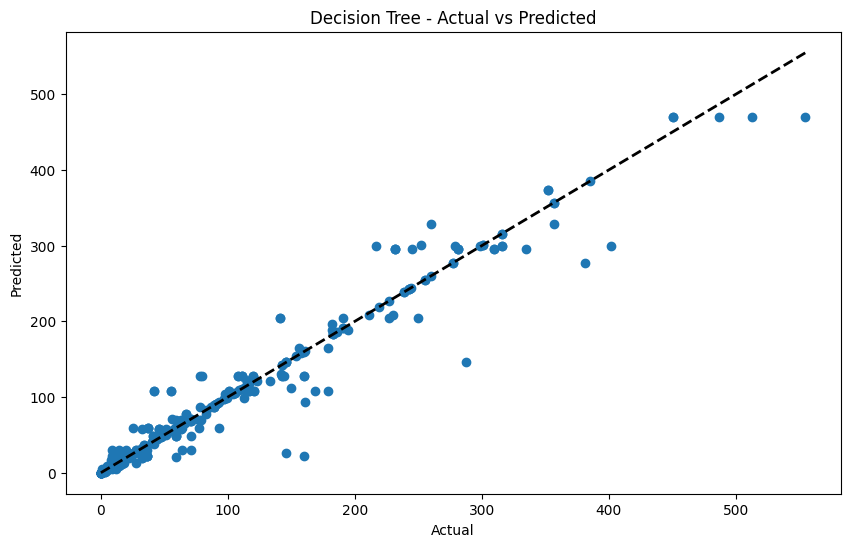

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Create a new feature for Boundary Percentage (percentage of runs from boundaries)
merged_df['Boundary_Percentage'] = (merged_df['4s'] + merged_df['6s']) / merged_df['Runs_Batting'] * 100

# Define features and target variable for consistency across models
X = merged_df[['Avg_Batting', 'Mat_Batting', 'SR_Batting', 'Boundary_Percentage']]
y = merged_df['Runs_Batting']

X = X.replace('-', np.nan)  # This line is crucial to handle the hyphens


# Impute missing values using the mean for feature set X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Parameter Tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Decision Tree Model
dt_model = DecisionTreeRegressor()

# GridSearchCV with cross-validation to find the best parameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model based on the grid search
best_dt_model = grid_search.best_estimator_

# Predictions and Evaluation
y_pred_dt = best_dt_model.predict(X_test)

# Performance metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print the results
print("Decision Tree:")
print(f"  - Best Parameters: {grid_search.best_params_}")
print(f"  - MSE: {mse_dt:.2f}, RMSE: {rmse_dt:.2f}, R-squared: {r2_dt:.2f}")

# Plotting the results: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree - Actual vs Predicted')
plt.show()


Random Forest:
  - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
  - MSE: 182.97, RMSE: 13.53, R-squared: 0.98


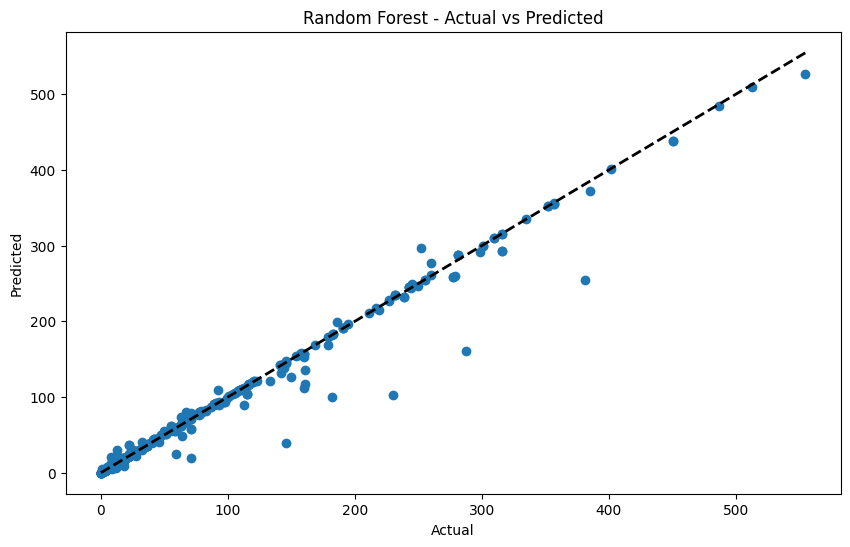

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Create a new feature for Boundary Percentage (percentage of runs from boundaries)
merged_df['Boundary_Percentage'] = (merged_df['4s'] + merged_df['6s']) / merged_df['Runs_Batting'] * 100

# Define features and target variable for consistency across models
X = merged_df[['Avg_Batting', 'Mat_Batting', 'SR_Batting', 'Boundary_Percentage']]
y = merged_df['Runs_Batting']

X = X.replace('-', np.nan)  # This line is crucial to handle the hyphens


# Impute missing values using the mean for feature set X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Parameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],            # Number of trees in the forest
    'max_depth': [None, 5, 10],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required at each leaf node
}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best Random Forest model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred_rf = best_rf_model.predict(X_test)

# Performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("Random Forest:")
print(f"  - Best Parameters: {grid_search.best_params_}")
print(f"  - MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, R-squared: {r2_rf:.2f}")

# Plotting the results: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Actual vs Predicted')
plt.show()


XGBoost Model:
  - Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}
  - MSE: 25.15, RMSE: 5.02, R-squared: 1.00


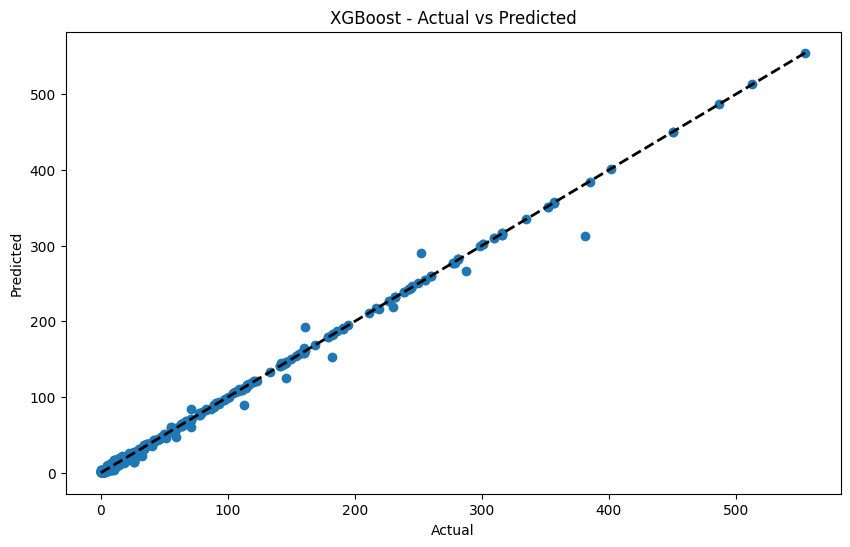

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
import numpy as np

# Assuming merged_df is already your DataFrame
# Define target variable (y)
y = merged_df['Runs_Batting']

# Define features for the XGBoost model
features = ['Avg_Batting', 'Mat_Batting', '4s', '6s']  # Excluding 'Runs_Batting' from features as it's the target
X = merged_df[features]

X = X.replace('-', np.nan)  # This line is crucial to handle the hyphens


# Drop 'Player' column from features if it exists (if player names are present)
if 'Player' in X.columns:
    X = X.drop(columns=['Player'])

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before fitting the model
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define the parameter grid for GridSearchCV (XGBoost hyperparameter tuning)
param_grid = {
    'n_estimators': [50, 100, 150],           # Number of boosting rounds
    'max_depth': [3, 5, 7],                    # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],        # Step size shrinkage to prevent overfitting
    'subsample': [0.8, 1.0],                   # Fraction of training data used for fitting trees
    'colsample_bytree': [0.8, 1.0]             # Fraction of features used to build each tree
}

# Initialize the XGBoost regressor (with GPU support if needed)
xgb_model = xgb.XGBRegressor(random_state=42, tree_method='auto')  # Default is CPU-based
# If GPU is available, you can try:
# xgb_model = xgb.XGBRegressor(random_state=42, tree_method='gpu_hist')

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Make predictions for the test set
xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate the model: Calculate MSE, RMSE, and R-squared
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Print the results
print("XGBoost Model:")
print(f"  - Best Parameters: {grid_search.best_params_}")
print(f"  - MSE: {xgb_mse:.2f}, RMSE: {xgb_rmse:.2f}, R-squared: {xgb_r2:.2f}")

# --- Plotting Results ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line (ideal case)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost - Actual vs Predicted')
plt.show()


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

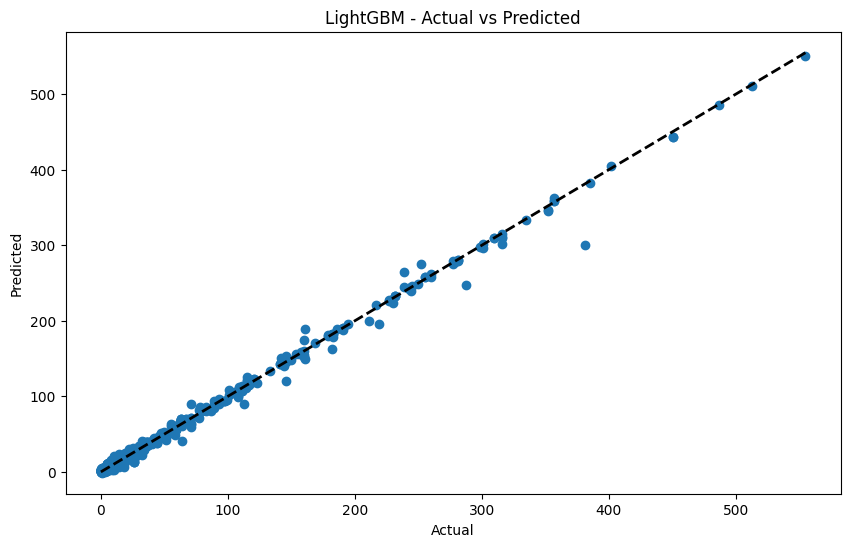

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import lightgbm as lgb

# Assuming merged_df is your DataFrame
# Define target variable (y)
y = merged_df['Runs_Batting']

# Define features for the model
features = ['Runs_Bowling', 'Avg_Batting', 'Mat_Batting', '4s', '6s']
X = merged_df[features]

X = X.replace('-', np.nan)  # This line is crucial to handle the hyphens


# Drop 'Player' column from features if it exists (safety check)
if 'Player' in X.columns:
    X = X.drop(columns=['Player'])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before fitting the model
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42, objective='regression', n_estimators=100, max_depth=5, learning_rate=0.1)

# Fit the model to the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the model
lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_rmse = np.sqrt(lgb_mse)
lgb_r2 = r2_score(y_test, lgb_predictions)

# Print performance metrics
print("LightGBM Model Performance:")
print(f"  - MSE: {lgb_mse:.2f}, RMSE: {lgb_rmse:.2f}, R-squared: {lgb_r2:.2f}")

# --- Hyperparameter Tuning using GridSearchCV ---
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 50, 100]
}

# Perform grid search
grid_search = GridSearchCV(lgb.LGBMRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_lgb_model = grid_search.best_estimator_

# Make predictions using the best model
best_lgb_predictions = best_lgb_model.predict(X_test)

# Evaluate the best model
best_lgb_mse = mean_squared_error(y_test, best_lgb_predictions)
best_lgb_rmse = np.sqrt(best_lgb_mse)
best_lgb_r2 = r2_score(y_test, best_lgb_predictions)

# Print best model performance
print("\nBest LightGBM Model Performance after Hyperparameter Tuning:")
print(f"  - Best Parameters: {grid_search.best_params_}")
print(f"  - MSE: {best_lgb_mse:.2f}, RMSE: {best_lgb_rmse:.2f}, R-squared: {best_lgb_r2:.2f}")

# --- Plotting the Results ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_lgb_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for ideal prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LightGBM - Actual vs Predicted')
plt.show()


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

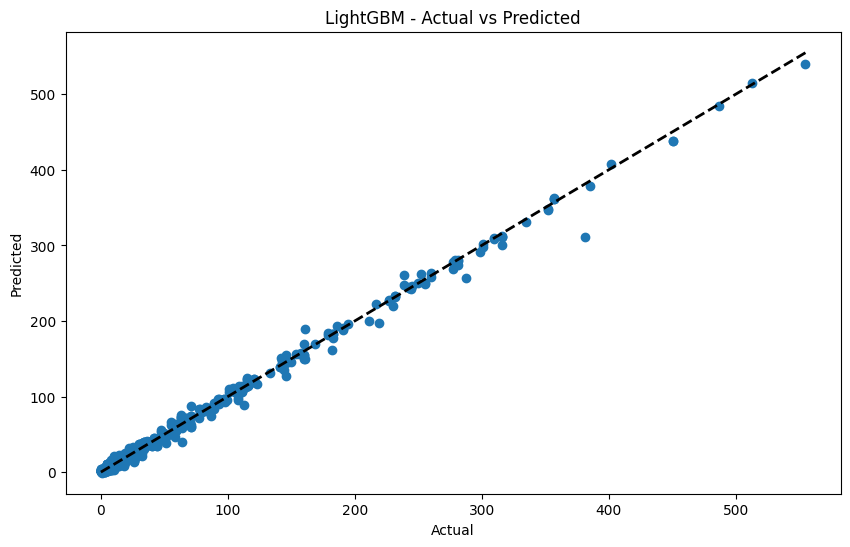

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import lightgbm as lgb

# Assuming merged_df is your DataFrame
# Define target variable (y)
y = merged_df['Runs_Batting']

# Define features for the model
features = ['Runs_Bowling', 'Avg_Batting', 'Mat_Batting', '4s', '6s']

# Remove constant features (if any)
X = merged_df[features].loc[:, merged_df[features].nunique() > 1]

X = X.replace('-', np.nan)  # This line is crucial to handle the hyphens


# Drop 'Player' column from features if it exists
if 'Player' in X.columns:
    X = X.drop(columns=['Player'])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before fitting the model
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and train the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42, objective='regression', n_estimators=100, max_depth=5, learning_rate=0.1)

# Fit the model to the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the model
lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_rmse = np.sqrt(lgb_mse)
lgb_r2 = r2_score(y_test, lgb_predictions)

# Print performance metrics
print("LightGBM Model Performance:")
print(f"  - MSE: {lgb_mse:.2f}, RMSE: {lgb_rmse:.2f}, R-squared: {lgb_r2:.2f}")

# --- Hyperparameter Tuning using GridSearchCV ---
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100]
}

# Perform grid search
grid_search = GridSearchCV(lgb.LGBMRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_lgb_model = grid_search.best_estimator_

# Make predictions using the best model
best_lgb_predictions = best_lgb_model.predict(X_test)

# Evaluate the best model
best_lgb_mse = mean_squared_error(y_test, best_lgb_predictions)
best_lgb_rmse = np.sqrt(best_lgb_mse)
best_lgb_r2 = r2_score(y_test, best_lgb_predictions)

# Print best model performance
print("\nBest LightGBM Model Performance after Hyperparameter Tuning:")
print(f"  - Best Parameters: {grid_search.best_params_}")
print(f"  - MSE: {best_lgb_mse:.2f}, RMSE: {best_lgb_rmse:.2f}, R-squared: {best_lgb_r2:.2f}")

# --- Plotting the Results ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_lgb_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for ideal prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LightGBM - Actual vs Predicted')
plt.show()


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 7.89196
LightGBM Model - RMSE: 7.89, R-squared: 0.99
Best iteration: 100
Accuracy (approximate): 99.35%


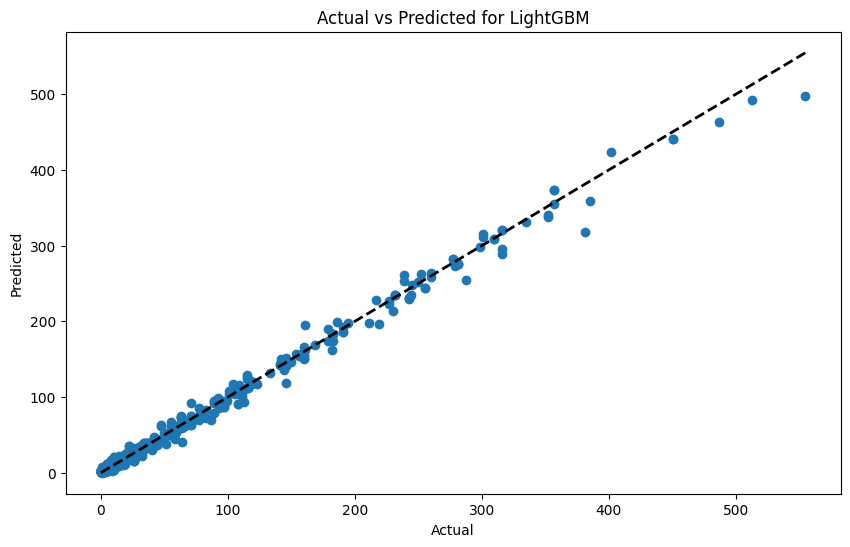

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import lightgbm as lgb

# Assuming merged_df is your DataFrame
# Define target variable (y)
y = merged_df['Runs_Batting']

# Define features for the model
features = ['Runs_Bowling', 'Avg_Batting', 'Mat_Batting', '4s', '6s']
X = merged_df[features]

# Replace hyphens with NaN to handle non-numeric values
X = X.replace('-', np.nan)

# Ensure all features are numeric (convert any non-numeric values to NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# Drop 'Player' column from features if it exists (safety check)
if 'Player' in X.columns:
    X = X.drop(columns=['Player'])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Impute missing values in X_test as well

# Create LightGBM Dataset objects
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model with early stopping using callbacks
num_round = 100
bst = lgb.train(params, train_data, num_round,
                valid_sets=[test_data],
                callbacks=[lgb.early_stopping(stopping_rounds=10)])  # Early stopping using callback


# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calculate accuracy as the proportion of correctly predicted values (if relevant to the regression task)
accuracy = (1 - (mse / np.var(y_test))) * 100  # A simple approximation of accuracy in regression

print(f"LightGBM Model - RMSE: {rmse:.2f}, R-squared: {r2:.2f}")
print(f"Best iteration: {bst.best_iteration}")
print(f"Accuracy (approximate): {accuracy:.2f}%")

# --- Plotting Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for LightGBM')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# Assuming merged_df is your DataFrame
# Define target variable (y)
y = merged_df['Runs_Batting']

# Define features for the model
features = ['Runs_Bowling', 'Avg_Batting', 'Mat_Batting', '4s', '6s']
X = merged_df[features]

# Replace hyphens with NaN to handle non-numeric values
X = X.replace('-', np.nan)

# Ensure all features are numeric (convert any non-numeric values to NaN)
X = X.apply(pd.to_numeric, errors='coerce')

# Drop 'Player' column from features if it exists (safety check)
if 'Player' in X.columns:
    X = X.drop(columns=['Player'])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Impute missing values in X_test as well

# --- 1. Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
accuracy_lr = (1 - (mse_lr / np.var(y_test))) * 100

# --- 2. Decision Tree ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
accuracy_dt = (1 - (mse_dt / np.var(y_test))) * 100

# --- 3. Random Forest ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = (1 - (mse_rf / np.var(y_test))) * 100

# --- 4. XGBoost ---
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
accuracy_xgb = (1 - (mse_xgb / np.var(y_test))) * 100

# --- 5. LightGBM ---
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

bst = lgb.train(params, train_data, 100,
                valid_sets=[test_data],
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

y_pred_lgb = bst.predict(X_test, num_iteration=bst.best_iteration)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
accuracy_lgb = (1 - (mse_lgb / np.var(y_test))) * 100

# --- Summarize results ---
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy (%)': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_lgb],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_xgb, mse_lgb],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_xgb, rmse_lgb],
    'R-squared': [r2_lr, r2_dt, r2_rf, r2_xgb, r2_lgb]
})

print(results)


Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 7.89196
               Model  Accuracy (%)         MSE       RMSE  R-squared
0  Linear Regression     97.736235  217.405649  14.744682   0.977362
1      Decision Tree     98.155321  177.157839  13.310065   0.981553
2      Random Forest     99.552927   42.935615   6.552527   0.995529
3            XGBoost     99.669222   31.767038   5.636225   0.996692
4           LightGBM     99.351470   62.283049   7.891961   0.993515


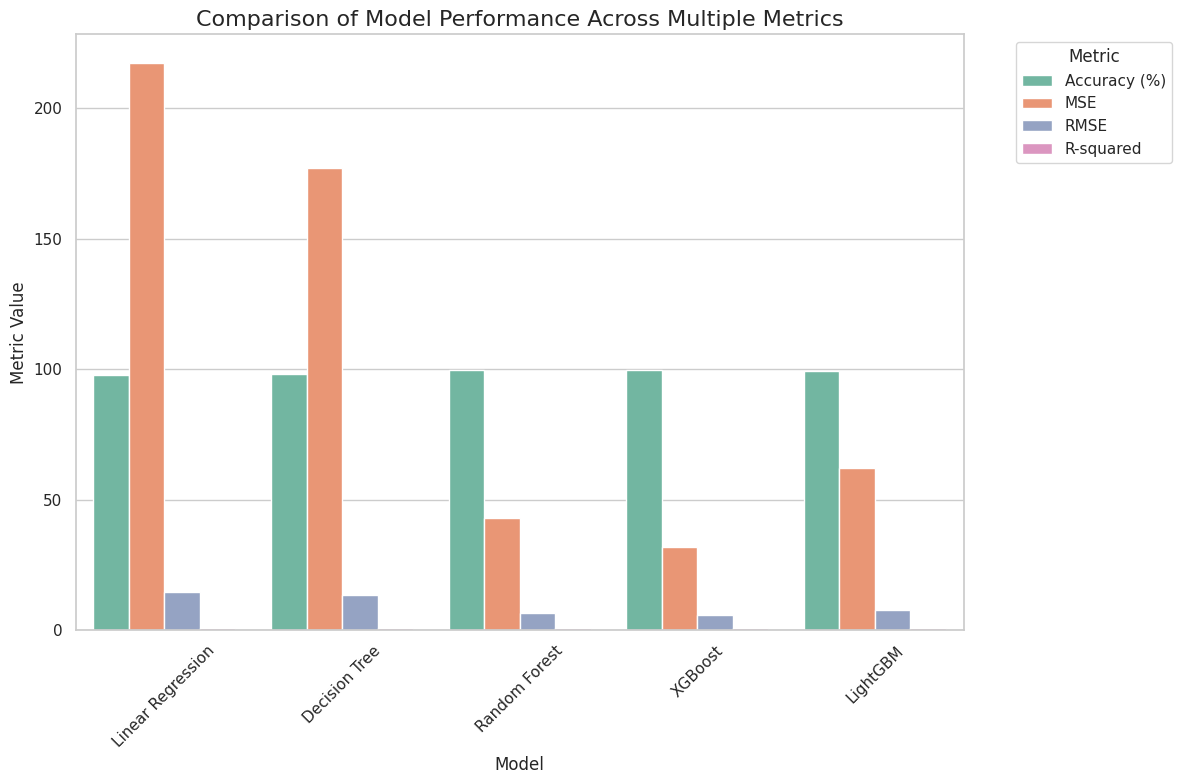

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results are already calculated for all models (as in your previous steps)
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy (%)': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_lgb],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_xgb, mse_lgb],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_xgb, rmse_lgb],
    'R-squared': [r2_lr, r2_dt, r2_rf, r2_xgb, r2_lgb]
})

# Melt the DataFrame to put all metrics in a single column for plotting
metrics = results.melt(id_vars="Model",
                       value_vars=["Accuracy (%)", "MSE", "RMSE", "R-squared"],
                       var_name="Metric", value_name="Value")

# Set the style for the plots
sns.set(style="whitegrid")

# Plot a grouped barplot for all metrics (Accuracy, MSE, RMSE, and R-squared)
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Value", hue="Metric", data=metrics, palette="Set2")

# Customize plot
plt.title('Comparison of Model Performance Across Multiple Metrics', fontsize=16)
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


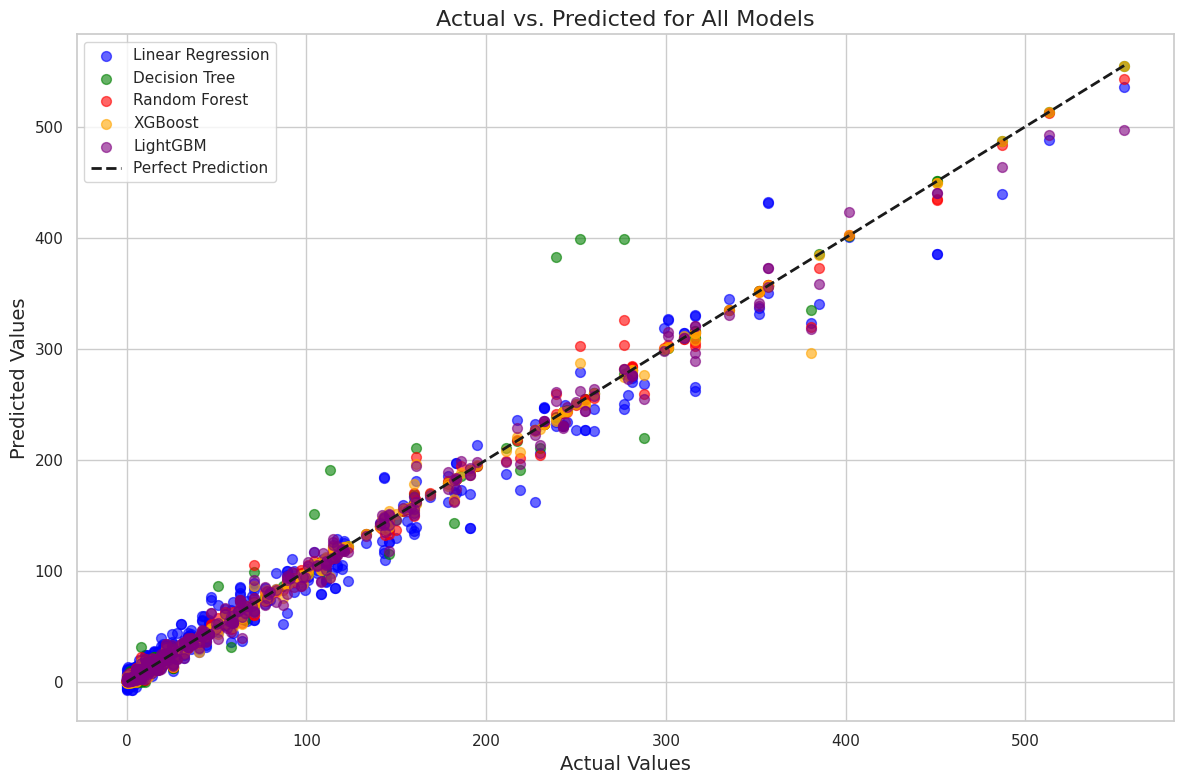

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the predictions for each model as follows:
# y_test is the actual target values from your test set
# y_pred_lr, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_lgb are the predictions for each model

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot Actual vs. Predicted for each model
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Linear Regression', s=50)
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.6, label='Decision Tree', s=50)
plt.scatter(y_test, y_pred_rf, color='red', alpha=0.6, label='Random Forest', s=50)
plt.scatter(y_test, y_pred_xgb, color='orange', alpha=0.6, label='XGBoost', s=50)
plt.scatter(y_test, y_pred_lgb, color='purple', alpha=0.6, label='LightGBM', s=50)

# Add a diagonal line (where predicted equals actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Prediction")

# Add labels and title
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for All Models', fontsize=16)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
